In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [8]:
#Explore Dataset
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [9]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [10]:
df.columns.values

array(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year',
       'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'], dtype=object)

In [11]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [12]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels
#Provide a table with the frequency of complaint types.
df['Month']=pd.to_datetime(df['Date']).dt.month_name()

In [26]:
m=df['Month'].value_counts()
m

June     1280
April     545
May       399
Name: Month, dtype: int64

In [27]:
m_df=pd.DataFrame(m).reset_index()
m_df.rename(columns={'index':'Count'},inplace=True)
m_df

,Count,Month
0,June,1280
1,April,545
2,May,399


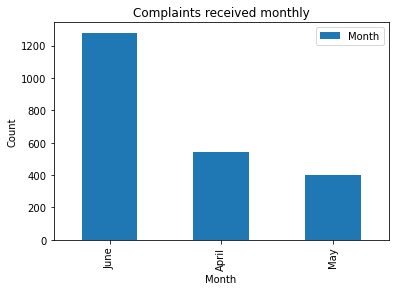

In [28]:
m_df.plot(x='Count',y='Month',kind='bar')
plt.title("Complaints received monthly")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [29]:
df['Date']=pd.to_datetime(df['Date'])

In [30]:
d=pd.DataFrame(df['Date']).groupby('Date').size().reset_index()
d.rename(columns={0:'Total Counts'},inplace=True)
d

,Date,Total Counts
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


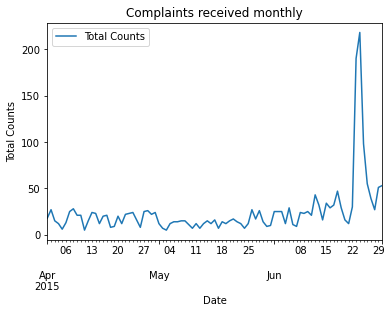

In [31]:
d.plot(x="Date",y="Total Counts")
plt.title("Complaints received monthly")
plt.xlabel("Date")
plt.ylabel("Total Counts")
plt.show()

In [32]:
d.sort_values(by='Total Counts',ascending=False)

,Date,Total Counts
84,2015-06-24,218
83,2015-06-23,190
85,2015-06-25,98
86,2015-06-26,55
90,2015-06-30,53
...,...,...
46,2015-05-17,7
41,2015-05-12,7
4,2015-04-05,6
10,2015-04-11,5


In [33]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Month                                  object
dtype: object

In [34]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [35]:
df['New Status']=['Open'  if status=="Open" or status=="Pending" else "Closed" for status in df['Status']]

In [36]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,New Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,April,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed


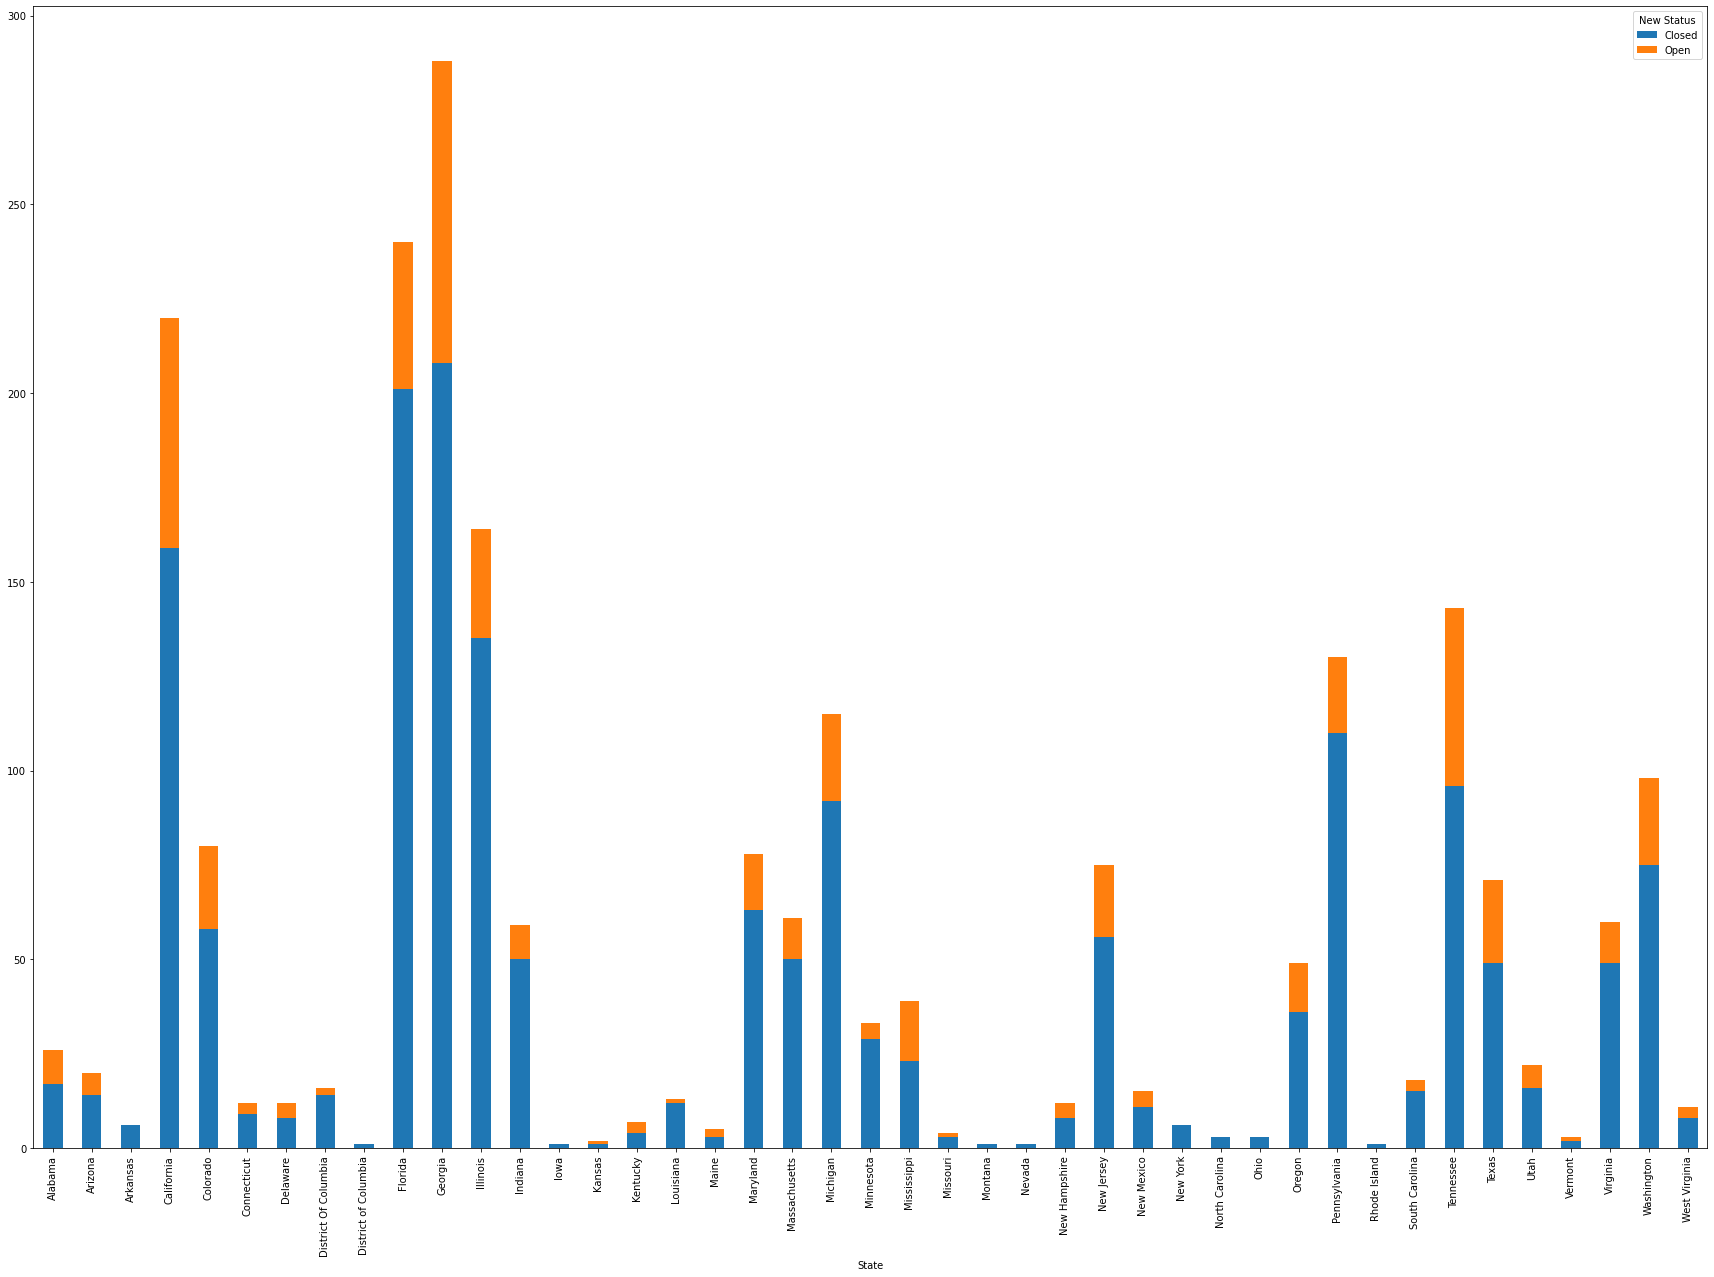

In [37]:
s=df.groupby(['State','New Status']).size().unstack()
s.plot(kind='bar',figsize=(30,21),stacked=True)
plt.show()

In [39]:
#Provide state wise status of complaints in a stacked bar chart.
#Which state has the maximum complaints
state_wise=df.groupby('State').size().sort_values(ascending=False)
state_wise

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

In [40]:
#Top 10# State Which has the maximum complaints
state_wise[0:10]

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
dtype: int64

In [45]:
#Which state has the highest percentage of unresolved complaints
unresolved=df.groupby(['State','New Status']).size().unstack().fillna(0)
unresolved=unresolved.sort_values(by='Open',ascending=False)
unresolved

New Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


In [42]:
#Top 10# State Which has the maximum complaints
unresolved_10=unresolved[0:10]
unresolved_10

New Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


In [44]:
unresolved['unresolved_percentage']=unresolved['Open']/unresolved['Open'].sum()*100
unresolved

New Status,Closed,Open,unresolved_percentage
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


In [54]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
recd_via=df.groupby(['Received Via','New Status']).size().unstack()
recd_via['resolved percentage']=recd_via['Closed']/recd_via['Closed'].sum()*100
recd_via

New Status,Closed,Open,resolved percentage
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886
